In [1]:
import numpy as np
import pandas as pd
import nltk
from tkinter import *
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
cleaned_data = pd.read_csv(r"Data Cleaning\Cleaned data\cleaned_data.csv")
genre_df = pd.read_csv(r"Data Cleaning\Cleaned data\genre.csv")
cleaned_data = cleaned_data.sort_values(by='primaryTitle')
cleaned_data = cleaned_data.set_index('titleId')
genre_df =genre_df.set_index('titleId')
index = list(cleaned_data.index.values)

In [3]:
train = pd.DataFrame([['The Incredibles', 7],['The Hangover',9],['Hotel Transylvania',7.5],['Annabelle',7],['The Martian',8],['Avengers: Infinity War',8.7],['Batman v Superman: Dawn of Justice',6.8],['Captain America: The Winter Soldier',9],['Kingsman: The Secret Service',7.3],['Mission: Impossible - Ghost Protocol',8.2],['Toy Story 3',7.6],['The Dark Knight',8.5],['The Dark Knight Rises',7.9],['Alice in Wonderland',5.5],['Hannah Montana: The Movie',1.5]])
train=train.sort_values(by=0)

In [4]:
feature=list(train[0])
label=pd.DataFrame(train[1])

In [5]:
genres_watched=[]
for t_id in range(0,len(cleaned_data)):
    if cleaned_data['primaryTitle'][t_id] in feature:
        #print(cleaned_data.iloc[t_id])
        genres_watched.append(genre_df.loc[index[t_id]])
genres_watched=pd.DataFrame(genres_watched)

In [6]:
per_genre=[0]*len(genres_watched.iloc[0])
for t_id in range(0,len(genres_watched)):
    for i in range(0,len(genres_watched.iloc[t_id])):
            per_genre[i] += genres_watched.iloc[t_id][i]/len(genres_watched)

In [7]:
k=0
for i in list(genre_df.columns):
    genre_df[i]=genre_df[i]*per_genre[k]
    k += 1

In [8]:
movie_genres_watched=[0]*len(genres_watched.iloc[0])
for t_id in range(0,len(genres_watched)):
    for i in range(0,len(genres_watched.iloc[t_id])):
        if movie_genres_watched[i]!=1:
            movie_genres_watched[i] += genres_watched.iloc[t_id][i]

In [9]:
def sigmoid(z,derivative=False):
    if derivative == True:
        return  (z)*(1-(z))
    return 1/(1+np.exp(-z))

def synapse_gen(number_input,neurons_in_layer):
    return 2*np.random.randn(number_input,neurons_in_layer)+1

In [10]:
def train_nn(Input,Output):
    
    
    synapse_0 = 2*np.random.randn(25,20)
    synapse_1 = 2*np.random.randn(20,20)
    synapse_2 = 2*np.random.randn(20,label.shape[1])

    alpha=0.3

    costs=[]
    np.random.seed(1)

    for j in range(5001):
        hidden_layer_1 = sigmoid(np.dot(Input,synapse_0))
        hidden_layer_2 = sigmoid(np.dot(hidden_layer_1,synapse_1))
        output_layer = sigmoid(np.dot(hidden_layer_2,synapse_2))
        
        output_layer_error =(output_layer-Output)

        if (j%10)==0:
            cost=[]
            for i in range(0,len(Input)):
                c= abs(output_layer_error[i])
                cost.append(c)
            costs.append(sum(cost))
            
        output_layer_delta = output_layer_error*sigmoid(output_layer,derivative=True)    
        
        hidden_layer_2_error = output_layer_delta.dot(synapse_2.T)
        hidden_layer_2_delta  = hidden_layer_2_error*sigmoid(hidden_layer_2,derivative=True)

        hidden_layer_1_error = hidden_layer_2_delta.dot(synapse_1.T)
        hidden_layer_1_delta = hidden_layer_1_error*sigmoid(hidden_layer_1,derivative=True)
        
        synapse_2 -= alpha*hidden_layer_2.T.dot(output_layer_delta)
        synapse_1 -= alpha*hidden_layer_1.T.dot(hidden_layer_2_delta)
        synapse_0 -= alpha*Input.T.dot(hidden_layer_1_delta)

    
    return output_layer,synapse_0,synapse_1,synapse_2,costs

In [11]:
feature_data = cleaned_data.drop(['primaryTitle','genres'],axis=1)
feature_data=feature_data.join(genre_df)
feature_data

feature_data['averageRating'] = feature_data['averageRating']/10
feature_data['startYear'] = feature_data['startYear']/max(feature_data['startYear'])
feature_data['numVotes'] = (feature_data['numVotes'])/max(feature_data["numVotes"])

In [12]:
feature_train=[]
for t_id in range(0,len(feature_data)):
    if cleaned_data['primaryTitle'][t_id] in feature:
        feature_train.append(list(feature_data.iloc[t_id]))
feature_train=np.array(feature_train)

In [13]:
label=np.array(label)/10

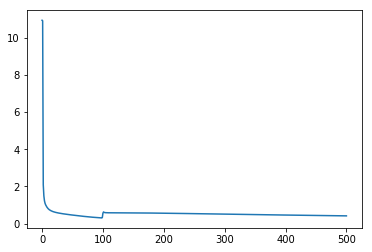

In [14]:
trained_results,synapse_0,synapse_1,synapse_2,costs = train_nn(feature_train,label)
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.plot(costs)

In [15]:
print('    trained  labels')
for i in range(0,len(label)):
    print(i,":",trained_results[i].round(2),"|",label[i])

    trained  labels
0 : [0.5] | [0.55]
1 : [0.67] | [0.7]
2 : [0.85] | [0.87]
3 : [0.64] | [0.68]
4 : [0.86] | [0.9]
5 : [0.13] | [0.15]
6 : [0.72] | [0.75]
7 : [0.7] | [0.73]
8 : [0.8] | [0.82]
9 : [0.84] | [0.85]
10 : [0.78] | [0.79]
11 : [0.88] | [0.9]
12 : [0.67] | [0.7]
13 : [0.78] | [0.8]
14 : [0.73] | [0.76]


In [16]:
def Predict(feature_train,label,cleaned_data,index):
    
    trained_results,synapse_0,synapse_1,synapse_2,costs = train_nn(feature_train,label)


    feature_test=[]
    index_selected=[]
    for t_id in range(0,len(cleaned_data)):
        count=0
        for i in range(0,len(movie_genres_watched)):
            if genre_df.loc[index[t_id]][i]:
                if movie_genres_watched[i]==0:
                    count=1
        if count==0:
            index_selected.append(t_id)
            feature_test.append(np.array(feature_data.iloc[t_id]))
    Input = np.array(feature_test)
    
    hidden_layer_1 = sigmoid(np.dot(Input,synapse_0))
    hidden_layer_2 = sigmoid(np.dot(hidden_layer_1,synapse_1))
    output_layer = sigmoid(np.dot(hidden_layer_2,synapse_2))

    Predicted_rating = pd.DataFrame(output_layer*100).round(2)
    remove_ind=[]
    for i in range(0,len(index)):
        if i not in index_selected:
            remove_ind.append(index[i])
    index = [i for i in index if i not in remove_ind]
    Predicted_rating.index=index
    Predicted_rating.columns=['recommendation']
    Predicted_rating.index.name='titleId'


    Predicted_rating=Predicted_rating.join(cleaned_data)

    Predicted_rating=Predicted_rating.sort_values(by='recommendation',ascending=False)

    return Predicted_rating

In [17]:
Predict(feature_train,label,cleaned_data,index)

,recommendation,primaryTitle,startYear,genres,numVotes,averageRating
titleId,,,,,,
tt0172495,97.25,Gladiator,2000,"action , drama , adventure",1140978,8.5
tt1375666,94.90,Inception,2010,"action , sci-fi , adventure",1725860,8.8
tt0372784,93.91,Batman Begins,2005,"action , adventure",1131891,8.3
tt0082971,93.71,Raiders of the Lost Ark,1981,"action , adventure",764999,8.5
tt0080684,93.30,Star Wars: Episode V - The Empire Strikes Back,1980,"action , fantasy , adventure",992502,8.8
tt0848228,93.22,The Avengers,2012,"action , sci-fi , adventure",1114755,8.1
tt0283524,92.69,Opasen char,1984,"comedy , thriller",1293,9.0
tt2015381,92.42,Guardians of the Galaxy,2014,"action , sci-fi , adventure",857261,8.1
tt0090605,92.30,Aliens,1986,"action , sci-fi , adventure",570783,8.4
